### Matriz de Gradiente de Deformación, Matriz de Gradiente de Desplazamiento y Tensor de Deformación. 
#### Clase de Mecánica de Sólidos,   2025. 
#### R. Zúñiga

(Consultar la pag. https://courses.eas.ualberta.ca/eas421/lecturepages/straintensors.html como información complementaria). <p>
(Para correr teclear "Shift-Enter" en cada celda) <br />
Si se corre desde Julia Box se puede correr sin cambios, si se corre desde una instalación local de Julia se deben instalar los siguientes paquetes mediante:
using Pkg<br /> Pkg.add("Plots")<br /> Pkg.add("LinearAlgebra")

In [1]:
#using Pkg
#Pkg.add("LinearAlgebra")
#Pkg.add("Plots")
using Plots
using LinearAlgebra

#### Definamos un punto o vector de posición, que llamamos x, por ejemplo:
 $ x = \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] $

In [2]:
x = [1.0,1.0]

2-element Vector{Float64}:
 1.0
 1.0

### Vamos a trabajar ahora con una matriz que llamaremos Gradiente de Deformación. 

El gradiente de deformación $ \bf F $ es la derivada de cada componente del vector deformado $ \bf $ con respecto a cada componente del vector de referencia $\bf X$. Para $ \bf x = \bf x({\bf X}) $

\begin{equation}
F_{ij} \quad = \quad x_{i,j} \quad = \quad \frac{\partial x_i}{\partial X_j} \quad = \quad 
\left[ \matrix{
{\partial x_1 \over \partial X_1} & {\partial x_1 \over \partial X_2} & {\partial x_1 \over \partial X_3} \\
{\partial x_2 \over \partial X_1} & {\partial x_2 \over \partial X_2} & {\partial x_2 \over \partial X_3} \\
{\partial x_3 \over \partial X_1} & {\partial x_3 \over \partial X_2} & {\partial x_3 \over \partial X_3}
} \right]
\end{equation}

#### La siguiente es para una "Cizalla simple¨ con valores de ejemplo
$
   F=
  \left[ {\begin{array}{cc}
   2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]
$

In [3]:
F = [ 2.0 1.0
      0.0 2.0]

2×2 Matrix{Float64}:
 2.0  1.0
 0.0  2.0

#### Un caso de "Cizalla pura", sería como sigue:
$
   F=
  \left[ {\begin{array}{cc}
   2.0 & 0.0 \\
   0.0 & 3.0 \\
  \end{array} } \right]
$

In [4]:
FP = [ 2.0 0.0
0.0 3.0]       # caso de cizalla pura

2×2 Matrix{Float64}:
 2.0  0.0
 0.0  3.0

### Usando la matriz de cizalla simple podemos calcular una matriz de "Gradiente de Desplazamiento" (la matriz que especificamos como J) como sigue:
$
   J= F - I=
  \left[ {\begin{array}{cc}
   2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]-
  \left[ {\begin{array}{cc}
   1.0 & 0.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]=
  \left[ {\begin{array}{cc}
   1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
$

In [5]:
J = (F-I)

2×2 Matrix{Float64}:
 1.0  1.0
 0.0  1.0

### y ahora podemos encontrar la posición del punto x desplazado a x´ durante una cizalla simple:
 $
 x'= [J] x = 
  \left[ {\begin{array}{cc}
  1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.0 \\
   1.0 \\
  \end{array} } \right] 
  $

In [6]:
xp = J*x

2-element Vector{Float64}:
 2.0
 1.0

### Ahora veamos qué pasa con los puntos que forman un cuadrado con un vértice en el origen

In [7]:
x1 = [1.0,1.0]; x2 = [1.0,0.0]; x3 = [0.0,0.0]; x4 = [0.0,1.0];
X = [x1'; x2'; x3'; x4' ; x1' ]

5×2 Matrix{Float64}:
 1.0  1.0
 1.0  0.0
 0.0  0.0
 0.0  1.0
 1.0  1.0

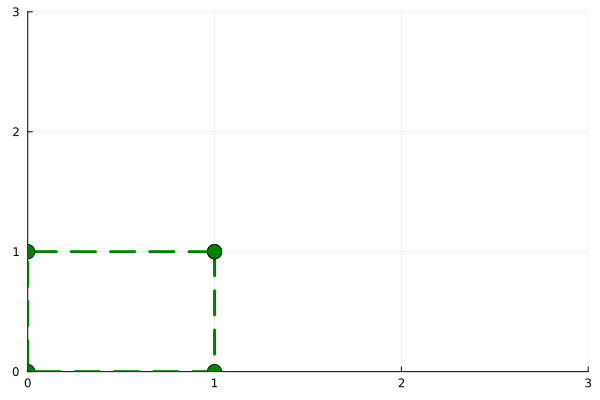

In [8]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green), leg = false, xlims = (0,3), ylims = (0,3))

### transformando con la matriz de Gradiente de Desplazamiento de cizalla simple
$
 x_1'= [J] x_1 = 
  \left[ {\begin{array}{cc}
  1.0 & 1.0 \\
   0.0 & 1.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.0 \\
   1.0 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [9]:
x1p = J*x1; x2p = J*x2; x3p = J*x3; x4p = J*x4;
XP = [x1p'; x2p'; x3p'; x4p' ; x1p']

5×2 Matrix{Float64}:
 2.0  1.0
 1.0  0.0
 0.0  0.0
 1.0  1.0
 2.0  1.0

### El resultado es el cudrado rojo con los puntos desplazados, el verde son los puntos originales 

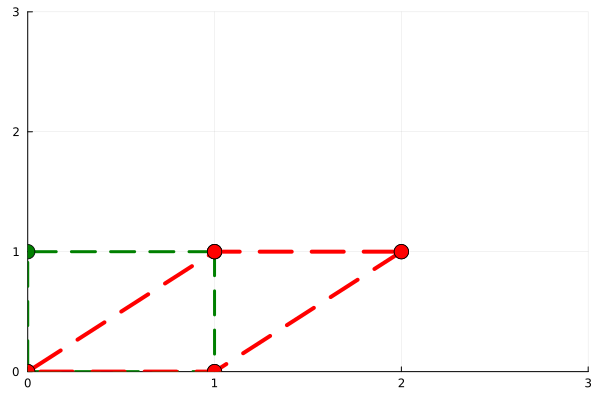

In [10]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green), leg = false, xlims = (0,3), ylims = (0,3))
plot!(XP[:,1],XP[:,2],line=(4,:dash,:red),m=(8,:red), xlims = (0,3), ylims = (0,3))

### Ahora veamos qué pasa al transformar con la matriz de Gradiente de Deformación
$
 x_1'= [F] x_1 = 
  \left[ {\begin{array}{cc}
  2.0 & 1.0 \\
   0.0 & 2.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  3.0 \\
   2.0 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [11]:
x1pp = F*x1; x2pp = F*x2; x3pp = F*x3; x4pp = F*x4;
XPP = [x1pp'; x2pp'; x3pp'; x4pp'; x1pp' ]

5×2 Matrix{Float64}:
 3.0  2.0
 2.0  0.0
 0.0  0.0
 1.0  2.0
 3.0  2.0

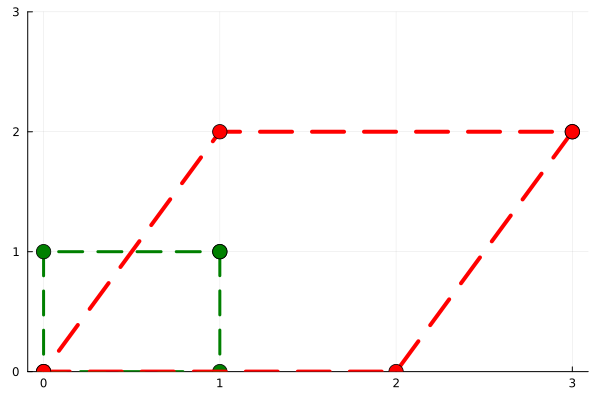

In [12]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green))
plot!(XPP[:,1],XPP[:,2],line=(4,:dash,:red),m=(8,:red), leg = false, ylims = ((0,3)))

### Podemos ver que además de la cizalla, se produce un cambio de volumen (expansión)

## Tensor de Deformación
### Vamos a crear ahora una matriz que se parezca a lo que definiremos como un Tensor de Deformación, promediando los valores fuera de la diagonal de la matriz de Gradiente de Deformación, de manera que sea simétrica, es decir:
$
   E=
  \left[ {\begin{array}{cc}
   2.0 & (1.0+0.0)/2 \\
   (1.0+0.0)/2 & 2.0 \\
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
   2.0 & 0.5 \\
   0.5 & 2.0 \\
  \end{array} } \right] 
$
### Notar que esta matriz es simétrica, mientras que las anteriores no lo son

In [13]:
E = [ 2.0 (F[1,2]+F[2,1])/2
      (F[1,2]+F[2,1])/2 2.0]

2×2 Matrix{Float64}:
 2.0  0.5
 0.5  2.0

### Y ahora transformamos nuestro cuadrado usando ese Tensor de Deformación, y vemos qué pasa
$
 x_1''= [E] x_1 = 
  \left[ {\begin{array}{cc}
  2.0 & 0.5 \\
   0.5 & 2.0 \\
  \end{array} } \right]
   \left[ {\begin{array}{c}
  1.0 \\
   1.0 \\
  \end{array} } \right] =
   \left[ {\begin{array}{c}
  2.5 \\
   2.5 \\
  \end{array} } \right] 
  $
  ### y así sucesivamente con cada punto

In [14]:
x1pp = E*x1; x2pp = E*x2; x3pp = E*x3; x4pp = E*x4;
XPP = [x1pp'; x2pp'; x3pp'; x4pp'; x1pp' ]

5×2 Matrix{Float64}:
 2.5  2.5
 2.0  0.5
 0.0  0.0
 0.5  2.0
 2.5  2.5

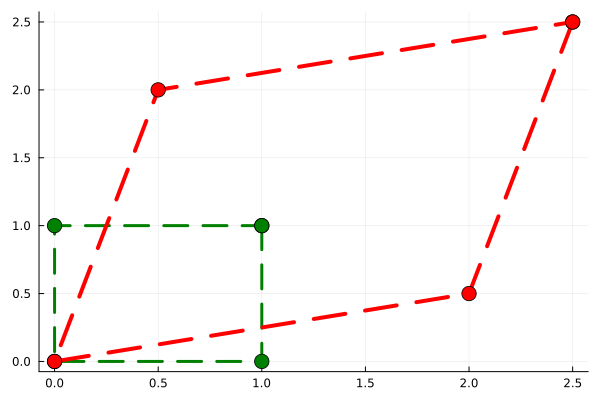

In [15]:
p1 = plot(X[:,1],X[:,2], line=(3,:dash,:green),m=(8,:green))
plot!(XPP[:,1],XPP[:,2],line=(4,:dash,:red),m=(8,:red), leg = false)

### Puede verse que se obtendría el mismo caso de cizalla simple, pero añadiendo una pequeña rotación

# Relación entre la Matriz de Gradiente de Deformación y el Tensor de Deformación

La relación entre la matriz de gradiente de deformación ($
{F}$) y el tensor de deformación ($\mathbf{E}$) es fundamental en la mecánica de sólidos deformables.

La **matriz de gradiente de deformación** ($\mathbf{F}$) describe la deformación de un sólido en términos de la relación entre las posiciones de los puntos en la configuración inicial y final. Se define como:

$$
\mathbf{F} = \frac{\partial \mathbf{x}}{\partial \mathbf{X}}
$$

donde $\mathbf{x}$ es la posición final de un punto y $\mathbf{X}$ es su posición inicial.

Por otro lado, el **tensor de deformación** ($\mathbf{E}$) describe la deformación en términos de la variación de la distancia entre puntos cercanos. Se define como:

$$
\mathbf{E} = \frac{1}{2} (\mathbf{F}^T \mathbf{F} - \mathbf{I})
$$

donde $\mathbf{F}^T$ es la transpuesta de $\mathbf{F}$, $\mathbf{I}$ es la matriz identidad y el factor $\frac{1}{2}$ se utiliza para asegurar que el tensor de deformación sea simétrico.

La relación entre $\mathbf{F}$ y $\mathbf{E}$ se puede expresar de la siguiente manera:

$$
\mathbf{E} = \frac{1}{2} \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} + \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right)^T + \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right)^T \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right) \right)
$$

donde $\mathbf{u}$ es el campo de desplazamiento, definido como $\mathbf{u} = \mathbf{x} - \mathbf{X}$.

## **Resumen**
La matriz de gradiente de deformación ($\mathbf{F}$) describe la deformación en términos de la relación entre las posiciones de los puntos, mientras que el tensor de deformación ($\mathbf{E}$) describe la deformación en términos de la variación de la distancia entre puntos cercanos. La relación entre $\mathbf{F}$ y $\mathbf{E}$ se establece a través de la ecuación:

$$
\mathbf{E} = \frac{1}{2} (\mathbf{F}^T \mathbf{F} - \mathbf{I}).
$$
